In [ ]:
1mm

In [ ]:
21cm 1.4GHz

In [ ]:
freq=3e8/1e-3
print(freq/1e9,'GHz')

In [ ]:
freq=3e8/21e-2
print(freq/1e9,'GHz')

In [ ]:
freq=3e8/850e-6
print(freq/1e9,'GHz')

In [ ]:
import sys
!{sys.executable} -m pip install astroquery #pyfftw

# import 

In [1]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.ipac.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord


In [2]:
#import numpy as np
#import pandas as pd

from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

import sys
!{sys.executable} -m pip install adjustText

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [4]:
#from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [5]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

## time_convert

In [6]:
from astropy.time import Time
from astropy.io import fits
import time
import datetime
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [7]:
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)

In [8]:
convert_xaxis_mjd(datetime.datetime(2015, 1, 11, 0, 0))

57033.0

# Fermi sources

In [9]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [10]:
import requests
r=requests.get(sources_individual_url)
demo=r.text


from bs4 import BeautifulSoup

sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                #print(name_i)

In [11]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text


sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                #print(Name_i)

In [12]:
len(sources_individual),len(sources_individual_Name)

(80, 80)

for url_name_,Name_ in zip(sources_individual,sources_individual_Name):
    print(url_name_,Name_)

In [14]:
Source_Name_dict = dict(zip(sources_individual,sources_individual_Name))#nametoName
Source_name_dict = dict(zip(sources_individual_Name,sources_individual))

In [ ]:
import json
import numpy as np
import pickle

with open('Source_Name_dict_pickle.json', "rb") as f:# load dict
    Source_Name_dict_load_pickle = pickle.load(f)

Source_Name_dict_load_pickle_Name2url  = dict(zip(Source_Name_dict_load_pickle .values(), Source_Name_dict_load_pickle .keys()))     

In [ ]:
Source_Name_dict_load_pickle

In [ ]:
Source_Name_dict_load_pickle_Name2url

In [ ]:
Source_Name_dict 

for i,j in zip(Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T.columns[0]],Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T.columns[2]]):
    print(i,j)

## root_dir

In [15]:
#root_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/'
#root_data_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/'

#data_root_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
root_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
root_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
Rphot_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'


sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'
root_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/'
root_obj_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/'#pmn_j0017.html

lag_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'

In [ ]:
root_dir,root_data_dir

Fermi_monitor_AGN_R[0].header

Fermi_monitor_AGN_V[0].header

In [ ]:
Fermi_monitor_AGN_V[0].data,Fermi_monitor_AGN_R[0].data

## read R V response

In [16]:
Fermi_monitor_AGN_V=fits.open('%s/V.fits'%root_dir)
Fermi_monitor_AGN_R=fits.open('%s/R.fits'%root_dir)

In [ ]:
len(Fermi_monitor_AGN_V)

## plot R V response

In [19]:
# Fermi_monitor_lambdas
Fermi_monitir_lambdas=np.linspace(3000,9000,61)
Fermi_monitir_lambdas

array([3000., 3100., 3200., 3300., 3400., 3500., 3600., 3700., 3800.,
       3900., 4000., 4100., 4200., 4300., 4400., 4500., 4600., 4700.,
       4800., 4900., 5000., 5100., 5200., 5300., 5400., 5500., 5600.,
       5700., 5800., 5900., 6000., 6100., 6200., 6300., 6400., 6500.,
       6600., 6700., 6800., 6900., 7000., 7100., 7200., 7300., 7400.,
       7500., 7600., 7700., 7800., 7900., 8000., 8100., 8200., 8300.,
       8400., 8500., 8600., 8700., 8800., 8900., 9000.])

In [20]:
len(Fermi_monitor_AGN_V[0].data),len(Fermi_monitor_AGN_R[0].data)

(61, 61)

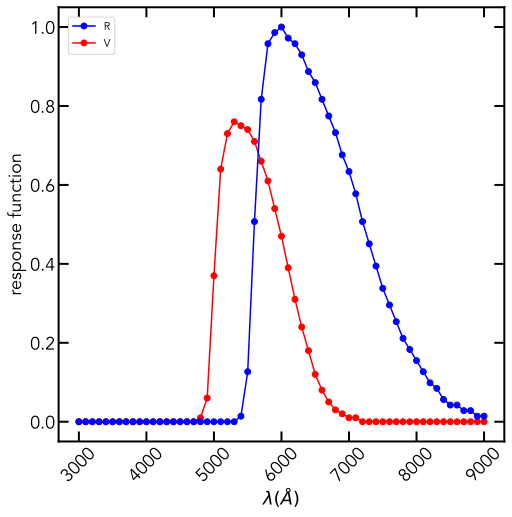

In [21]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_V[0].data,color='red',marker='o',label='V')
ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda(\AA)$')
ax.set_ylabel(r'response function')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
pwd

In [ ]:
!open /Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM

# def get_data_name

## def get_poldata_name(root_dir,name_i)

In [ ]:
def get_poldata_name(root_dir,name_i):
    
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_pol_lc.png')
       
    
    
    Poldata_i=pd.DataFrame([])
    
    for i in range(10):
        
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)
            Poldata_select=Poldata[[Poldata.columns[3],Poldata.columns[9],Poldata.columns[10]]]
            Poldata_i=Poldata_i.append(Poldata_select,ignore_index=True)

                 
    return  Poldata_i           

In [ ]:
name_i= 'PKS 1510-08' 
# sourcename='pks1510'
# SourceName='PKS 1510-08'
#source_name_i=Source_name_dict[source_Name_i]
#source_Name_i=Source_Name_dict[source_name_i]  
Poldata_i= get_poldata_name(root_dir,name_i)



In [ ]:
Poldata_i['mjd']=Poldata_i['JD']- 2400000.5
Poldata_i=Poldata_i.sort_values('mjd')
print(name_i)
Poldata_i.to_csv('%s/%s_pol.csv'%(root_dir,name_i),index=False)

In [ ]:
Poldata_i.columns

In [ ]:
def get_pol_pa_data_name(root_dir,name_i):
    
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_pol_lc.png')
       
    
    
    Poldata_i=pd.DataFrame([])
    
    for i in range(10):
        
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)
            Poldata_select=Poldata[[Poldata.columns[3],Poldata.columns[11],Poldata.columns[12]]]
            Poldata_i=Poldata_i.append(Poldata_select,ignore_index=True)                
    return  Poldata_i           

In [ ]:
name_i= 'PKS 1510-08' 
# sourcename='pks1510'
# SourceName='PKS 1510-08'
#source_name_i=Source_name_dict[source_Name_i]
#source_Name_i=Source_Name_dict[source_name_i]  
Pol_PA_data_i= get_pol_pa_data_name(root_dir,name_i)



In [ ]:
Pol_PA_data_i

Pol_PA_data_i['mjd']=Pol_PA_data_i['JD']- 2400000.5
Pol_PA_data_i=Pol_PA_data_i.sort_values('mjd')
print(name_i)
Pol_PA_data_i.to_csv('%s/%s_pol_pa.csv'%(root_dir,name_i),index=False)

## def get_Vdata_name(root_dir,name_i)

In [ ]:
def get_Vdata_name(root_dir,name_i):
    
    source_Name_i=name_i.strip()   
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
  
    Poldata_i=pd.DataFrame([])
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)  
            Poldata_select=Poldata[[Poldata.columns[3],Poldata.columns[7],Poldata.columns[8]]]
            Poldata_i=Poldata_i.append(Poldata_select,ignore_index=True)
            
            #Poldata['JD']- 2400000.5,
            #y=Poldata['V'],
            #yerr=Poldata['σ(V)'],

    return  Poldata_i             


In [ ]:
name_i= 'PKS 1510-08' 
Vdata_i=get_Vdata_name(root_dir,name_i)

In [ ]:
Vdata_i['mjd']=Vdata_i['JD']- 2400000.5
Vdata_i=Vdata_i.sort_values('mjd')
print(name_i)
Vdata_i.to_csv('%s/%s_V.csv'%(root_dir,name_i),index=False)

In [ ]:
Vdata_i.columns

## def get_Rdata_name(root_dir,name_i)

In [ ]:
def get_Rdata_name(root_dir,name_i):
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 

    Rphot_i=pd.DataFrame([])
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        #x=Rphot_name['JD']- 2400000.5,
        #y=Rphot_name['R'],
        #yerr=Rphot_name['σ(R)'],
        Rphot_select=Rphot_name[[Rphot_name.columns[3],Rphot_name.columns[7],Rphot_name.columns[8]]]
        Rphot_i=Rphot_i.append(Rphot_select,ignore_index=True)
        

    return  Rphot_i             
 

In [ ]:
name_i= 'PKS 1510-08' 
Rphot_i =get_Rdata_name(root_dir,name_i)

In [ ]:
Rphot_i.columns

In [ ]:
Rphot_i['mjd']=Rphot_i['JD']- 2400000.5
Rphot_i=Rphot_i.sort_values('mjd')
print(name_i)
Rphot_i.to_csv('%s/%s_R.csv'%(root_dir,name_i),index=False)

In [ ]:
len(Rphot_i)

# Fermi_AGN_list_ned

In [ ]:
Fermi_AGN_list=pd.read_excel('%s/FermiAGN_namelist_ned.xlsx'%root_dir,header=0,skiprows=[1,2])

In [ ]:
Fermi_AGN_list.columns

In [ ]:
Fermi_AGN_list_name_redshift=Fermi_AGN_list[['      Input Object Name       ',' Redshift ']]

In [ ]:
Fermi_AGN_list_name_redshift

In [ ]:
for i in range(len(Fermi_AGN_list_name_redshift)):
    if isinstance(Fermi_AGN_list_name_redshift.iloc[i][1],(int,float)):
        
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]
    else:
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=0
        
        

In [ ]:
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift[Fermi_AGN_list_name_redshift['z_value']>0]
Fermi_AGN_list_name_redshift_T=drop_index(Fermi_AGN_list_name_redshift_T)

In [ ]:
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift_T.sort_values('z_value')

In [ ]:
7000/6563-1

## z<0.1

In [ ]:
Fermi_AGN_z_lt0dot1=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['z_value']<0.1]

In [ ]:
Fermi_AGN_z_lt0dot1=drop_index(Fermi_AGN_z_lt0dot1)

In [ ]:
Fermi_AGN_z_lt0dot1

In [ ]:
root_data_dir

In [ ]:
Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values

In [ ]:
spec_info=pd.DataFrame([],columns=Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values)
#spec_info.columns=Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values

In [ ]:
spec_info

## 3C

In [ ]:
Fermi_3C_sources=['3C 273','3C 279','3C 345','3C 454.3','3C 66A']

In [ ]:
for i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    spec_num=0
    save_path_dir=os.path.join(root_data_dir,source_name_i)
    #print(save_path_dir)
    #os.chdir(save_path_dir)
    for file in os.listdir(save_path_dir):
        if os.path.isdir(os.path.join(save_path_dir,file)):
            #print(file)
            specfiles=os.listdir(os.path.join(save_path_dir,file))
            for specfile in specfiles:
                if specfile.find('spec')>0 and specfile.endswith('.fits'):
                    spec_num=spec_num+1    
                    #print(specfile[-11:-5])
    print(source_Name_i,spec_num)        


In [ ]:
3C 273

In [ ]:
146.8*(1+0.158339)

### 3C273

In [ ]:
#source_name='pks1510'
source_Name='3C 273'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'3c273.fc.spec_081124.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))


fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(5000,7400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## spec_Num

In [ ]:
for i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    spec_num=0
    save_path_dir=os.path.join(root_data_dir,source_name_i)
    #print(save_path_dir)
    #os.chdir(save_path_dir)
    for file in os.listdir(save_path_dir):
        if os.path.isdir(os.path.join(save_path_dir,file)):
            #print(file)
            specfiles=os.listdir(os.path.join(save_path_dir,file))
            for specfile in specfiles:
                if specfile.find('spec')>0 and specfile.endswith('.fits'):
                    spec_num=spec_num+1    
                    #print(specfile[-11:-5])
    print(source_Name_i,spec_num)        


Name spec_NUM
PKS 1510-08 451
Mrk 421 843
Mrk 501 609
1ES 2344+514 238
1ES 1959+650 195
1H 0323+342 3
BL Lac 757

## Rband_num

In [ ]:
i=0
Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))

In [ ]:
Rphot['Object'][0]

In [ ]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    print(source_Name_i)

In [ ]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    Rband_num=0 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        Rband_num=len(Rphot_name)+Rband_num
    print(source_Name_i,Rband_num)          
        

## Rbandplot

In [ ]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Rphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111) 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        ax.errorbar(x=Rphot_name['JD']- 2400000.5,
                    y=Rphot_name['R'],
                    yerr=Rphot_name['σ(R)'],
                    color='red',marker='o',label='R')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'R (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')        
        

In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Rphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111) 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        ax.errorbar(x=Rphot_name['JD']- 2400000.5,
                    y=Rphot_name['R'],
                    yerr=Rphot_name['σ(R)'],
                    color='red',marker='o',label='R')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'R (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')        
        

### Sources_select=['PKS 1510-08']

In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Sources_select:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Rphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111) 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        ax.errorbar(x=Rphot_name['JD']- 2400000.5,
                    y=Rphot_name['R'],
                    yerr=Rphot_name['σ(R)'],
                    color='red',marker='o',label='R')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'R (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')        
        

## poloarization

In [ ]:
source_name_i='pks1510'
prefix=''
Poldata=pd.read_excel(os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx'))
print(Poldata.columns[3],Poldata.columns[9],Poldata.columns[10])

Poldata[[Poldata.columns[3],Poldata.columns[9],Poldata.columns[10]]]

In [ ]:
Poldata.columns

In [ ]:
Fermi_3C_sources

In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_pol_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)              
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['P (%)'],
                    #yerr=Poldata['σ(P) (%)'],
                    y=Poldata[Poldata.columns[9]],
                    yerr=Poldata[Poldata.columns[10]],    
                    color='red',marker='o',label='P (%)')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'polarization degree')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    ax.set_xlim(54800,57200)
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### PKS 1510-08

In [ ]:
Sources_select=['PKS 1510-08']

In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Sources_select:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_pol_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)              
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['P (%)'],
                    #yerr=Poldata['σ(P) (%)'],
                    y=Poldata[Poldata.columns[9]],
                    yerr=Poldata[Poldata.columns[10]],    
                    color='red',marker='o',label='P (%)')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'polarization degree')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    #ax.set_xlim(54800,57200)
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## Vphot

In [ ]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Vphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)        
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    y=Poldata['V'],
                    yerr=Poldata['σ(V)'],
                    color='red',marker='o',label='V')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'V (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:    
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Vphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)        
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['V'],
                    #yerr=Poldata['σ(V)'],
                        y=Poldata[Poldata.columns[7]],
                        yerr=Poldata[Poldata.columns[8]],
                        
                        
                    color='red',marker='o',label='V')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'V (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### Sources_select=['PKS 1510-08']

In [ ]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Sources_select:    
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Vphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)        
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['V'],
                    #yerr=Poldata['σ(V)'],
                    y=Poldata[Poldata.columns[7]],
                    yerr=Poldata[Poldata.columns[8]],                      
                    color='red',marker='o',label='V')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'V (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## spec

The spectra span the range of 4000-7550 Å with a dispersion 4 Å/pixel. Depending on the width of the slit used for the observation, the resolution is typically between 16-24 Å

In [ ]:
Fermi_AGN_list_name_redshift_T.columns

In [ ]:
Fermi_AGN_list_name_redshift_T.iloc[0][0]

### pks1510

In [ ]:
#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))


fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3e'%source_z.values[0])

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(5000,7400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
#z_pks1510 = 0.361
#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
#ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### z_pks1510 = 0.361

In [ ]:
#z_pks1510 = 0.361

#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'_z=0.361_.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
#z_pks1510 = 0.361

#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'_z=0.361_.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### Mrk 421

In [ ]:
#source_name='pks1510'
source_Name='Mrk 421'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'mrk421.fc.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### Mrk 501

In [ ]:
#source_name='pks1510'
source_Name='Mrk 501'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'mrk501.fc.spec_081006.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1ES 2344+514

In [ ]:
#source_name='pks1510'
source_Name='1ES 2344+514'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'1es2344.spec_081003.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1ES 1959+650

In [ ]:
#source_name='pks1510'
source_Name='1ES 1959+650'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'1es1959.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1H 0323+342

In [ ]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_130905.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



In [ ]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_130906.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



In [ ]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_131005.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



## BL Lac

In [ ]:
#source_name='pks1510'
source_Name='BL Lac'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'bllac.fc.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')
ax.set_xlim(6000,7000)
ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
#Fermi_AGN_list_redshift=Fermi_AGN_list_name_redshift.dropna(axis = 0)
#Fermi_AGN_list_redshift=drop_index(Fermi_AGN_list_redshift)

In [ ]:
len(Fermi_AGN_list_redshift)

In [ ]:
Fermi_AGN_list_redshift.iloc[2][1]

In [ ]:
plt.hist(Fermi_AGN_list_name_redshift_T[' Redshift '])

In [ ]:
plt.hist(5100*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

In [ ]:
plt.hist(4861*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

In [ ]:
plt.hist(6563*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

# Halpha Hbeta

In [ ]:
z_3c273=0.158339
6563*(1+z_3c273),4861*(1+z_3c273)

In [ ]:
7000/6563-1

In [ ]:
6563/4861-1

In [ ]:
4861*(1+0.361),6563*(1+0.006815)

# SMA

In [ ]:
sma_url='http://sma1.sma.hawaii.edu/callist/callist.html'

In [ ]:
all_tables = pd.read_html(sma_url)
sma_table=all_tables[3] 

In [ ]:
sma_table

In [ ]:
sma_table.columns[0],sma_table.columns[1]

In [ ]:
sma_table[('Source Name', 'common')]

In [ ]:
if not os.path.exists('%s/sma_info.xlsx'%root_dir):
    sma_table.to_excel('%s/sma_info.xlsx'%root_dir,header=0)

# VLA/VLAB

In [ ]:
calsources_url='https://www.aoc.nrao.edu/~smyers/calibration/calsources.shtml'

In [ ]:
VLA_calibrator_C_url='https://www.aoc.nrao.edu/~smyers/calibration/C_band.shtml'

## Master Calibration Database

In [ ]:
master_url='https://www.aoc.nrao.edu/~smyers/calibration/master.shtml'

# mojava 15

In [ ]:
lag_data_dir

In [ ]:
data_PKS1510_dir_mojave=lag_data_dir
mojave_15GHz_PKS1510=pd.read_excel('%s/VLBA_PKS1510_089.xlsx'%data_PKS1510_dir_mojave,sheet_name='Sheet1')
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA I'].notnull()]
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA Code'].notnull()]

mojave_15GHz_PKS1510.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                            'I Image (Nat. Weight)', 'Tapered I Image',
                            'Tapered I Image (Widefield)', 'Visibility',
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_PKS1510['mjd']=convert_mjd(mojave_15GHz_PKS1510['Epoch'])
mojave_15GHz_PKS1510['flux']=mojave_15GHz_PKS1510['VLBA I']/1000
mojave_15GHz_PKS1510['err']=mojave_15GHz_PKS1510['flux']*0.05
mojave_15GHz_PKS1510=drop_index(mojave_15GHz_PKS1510)

In [ ]:
mojave_15GHz_PKS1510

In [ ]:
mojave_15GHz_PKS1510[['mjd','flux','err']].to_csv('%s/%s_VLBA_I_Jy.csv'%(root_dir,name_i),index=False)

In [ ]:
mojave_15GHz_PKS1510_Pol=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA percentage'].notnull()]
mojave_15GHz_PKS1510_Pol=drop_index(mojave_15GHz_PKS1510_Pol)
mojave_15GHz_PKS1510_Pol['VLBA percentage error']=mojave_15GHz_PKS1510_Pol['VLBA percentage']*0.05

In [ ]:
mojave_15GHz_PKS1510_Pol[['mjd','VLBA percentage','VLBA percentage error']].to_csv('%s/%s_VLBA_Pol.csv'%(root_dir,name_i),index=False)

In [ ]:
mojave_15GHz_PKS1510_Pol_PA=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA degree'].notnull()]
mojave_15GHz_PKS1510_Pol_PA=drop_index(mojave_15GHz_PKS1510_Pol_PA)
mojave_15GHz_PKS1510_Pol_PA['VLBA degree error']=mojave_15GHz_PKS1510_Pol_PA['VLBA degree']*0.05

mojave_15GHz_PKS1510_Pol_PA[['mjd','VLBA degree','VLBA degree error']].to_csv('%s/%s_VLBA_Pol_PA.csv'%(root_dir,name_i),index=False)

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3'],
                    'E': ['E0', 'E1', 'E2', 'E3']
                   })
df2 = pd.DataFrame({ 'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7'],
                     'F': ['F4', 'F5', 'F6', 'F7']
                   })


In [ ]:
pd.concat([df1,df2],ignore_index=True)

In [ ]:
pwd